## Linear Models as Neural Networks Prac 1

### Practical Introduction to Deep Learning Workshop

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***


## Various Python imports

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Define a dataset

In [ ]:
X=np.arange(-40, 40, 0.01).reshape(-1, 1)
Y=np.square(X)

In [ ]:
X_test=np.arange(-60, 60, 1).reshape(-1, 1)
Y_test=np.square(X_test)

In [ ]:
X[0:5]

array([[-40.  ],
       [-39.99],
       [-39.98],
       [-39.97],
       [-39.96]])

In [ ]:
Y[0:5]

array([[1600.    ],
       [1599.2001],
       [1598.4004],
       [1597.6009],
       [1596.8016]])

In [ ]:
X[1]**2-5

array([1594.2001])

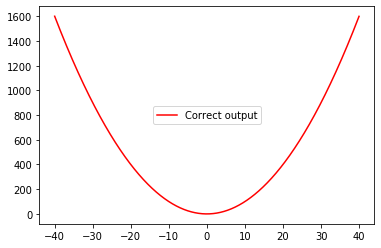

In [ ]:
plt.plot(X,Y,color='r',label='Correct output')
plt.legend(loc='center')
plt.show()

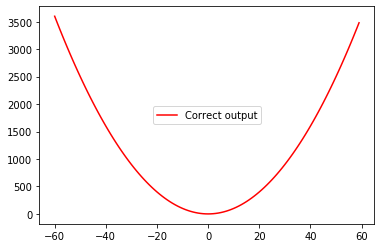

In [ ]:
plt.plot(X_test,Y_test,color='r',label='Correct output')
plt.legend(loc='center')
plt.show()

## What simple linear model do you think could be used to solve this problem?

## y = .... ?

## Step 1: Define a sequential model

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(units=8, input_shape=[1], activation='elu'))
model.add(keras.layers.Dense(units=8, activation='elu'))
model.add(keras.layers.Dense(units=4, activation='elu'))
model.add(keras.layers.Dense(units=4, activation='elu'))
model.add(keras.layers.Dense(units=1, activation='elu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(loss = 'mean_squared_error', optimizer="adam", metrics=['mse'])

In [ ]:
history = model.fit(X, Y, epochs=100, verbose=2, batch_size=32)

Train on 8000 samples
Epoch 1/100
8000/8000 - 1s - loss: 464790.5968 - mean_squared_error: 464790.4688
Epoch 2/100
8000/8000 - 0s - loss: 132952.6150 - mean_squared_error: 132952.5938
Epoch 3/100
8000/8000 - 0s - loss: 35272.5493 - mean_squared_error: 35272.5430
Epoch 4/100
8000/8000 - 0s - loss: 32529.7131 - mean_squared_error: 32529.7148
Epoch 5/100
8000/8000 - 0s - loss: 29057.8120 - mean_squared_error: 29057.8086
Epoch 6/100
8000/8000 - 0s - loss: 24609.5513 - mean_squared_error: 24609.5527
Epoch 7/100
8000/8000 - 0s - loss: 20120.4775 - mean_squared_error: 20120.4707
Epoch 8/100
8000/8000 - 0s - loss: 16689.4625 - mean_squared_error: 16689.4707
Epoch 9/100
8000/8000 - 0s - loss: 14528.1293 - mean_squared_error: 14528.1328
Epoch 10/100
8000/8000 - 0s - loss: 13318.8789 - mean_squared_error: 13318.8750
Epoch 11/100
8000/8000 - 0s - loss: 12286.5717 - mean_squared_error: 12286.5713
Epoch 12/100
8000/8000 - 0s - loss: 11399.4353 - mean_squared_error: 11399.4385
Epoch 13/100
8000/8000 

## Plot the training history

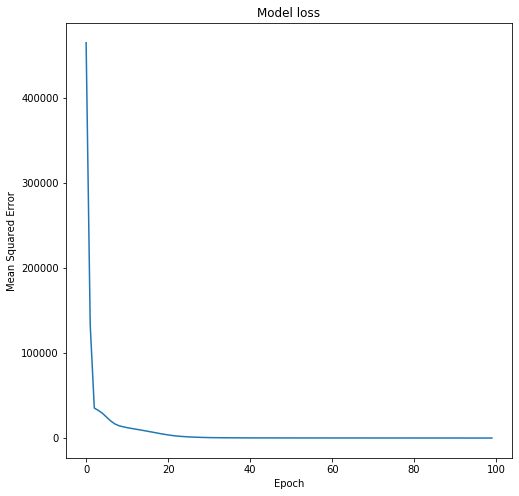

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.show()

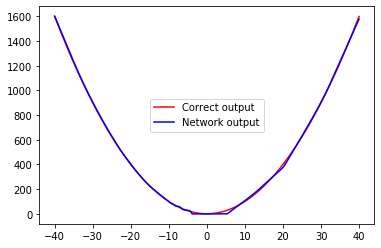

In [ ]:
plt.plot(X,Y,color='r',label='Correct output')
plt.plot(X,model.predict(X),color='b',label='Network output')
plt.legend(loc='center')
plt.show()

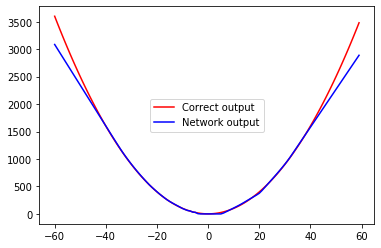

In [ ]:
plt.plot(X_test,Y_test,color='r',label='Correct output')
plt.plot(X_test,model.predict(X_test),color='b',label='Network output')
plt.legend(loc='center')
plt.show()

## Predict on some value

In [ ]:
model.predict([6.0])

array([[14.493683]], dtype=float32)

In [ ]:
6**2

36

## View the weights of the model

In [ ]:
model.get_weights()

[array([[-0.12875125, -0.46679282, -1.0304979 , -0.17788395, -0.7869735 ,
          1.258398  ,  1.2437761 ,  0.7889011 ]], dtype=float32),
 array([-4.8340306 , -3.8939111 , -2.0751185 , -6.1393385 , -2.6970186 ,
        -0.11278529,  0.7670245 ,  0.10560464], dtype=float32),
 array([[ 1.5885427 ,  0.8399459 ,  1.407352  ,  0.01678569, -1.867666  ,
          0.4296415 , -0.47421372,  2.5269053 ],
        [ 1.1278539 ,  0.44505158,  0.92336535, -0.62528497, -1.8590341 ,
          0.53056324, -0.6990181 ,  1.110855  ],
        [ 0.45110154,  0.1335005 , -0.10259857, -0.55160254, -2.202848  ,
          0.30157667, -2.0560822 ,  1.2276123 ],
        [ 2.7852268 ,  3.2279406 ,  1.6073581 , -0.46267113, -1.874363  ,
          2.3339057 , -0.70306575,  2.8671114 ],
        [ 0.93860185,  0.50541294,  0.6875555 , -0.54313457, -2.3633976 ,
         -0.28285056, -1.9450971 ,  0.8641452 ],
        [ 0.26407614,  0.6124925 ,  0.92427725,  0.9833819 ,  0.16463515,
          0.9822691 , -0.03006957,

## Extract the first weight

In [ ]:
model.layers[0].get_weights()[0][0][0]

-0.12875125

## Extract the bias

In [ ]:
model.layers[0].get_weights()[1][0]

-4.8340306

## Insert the values, does this give the same result as the predict function?

In [ ]:
34*model.layers[0].get_weights()[0][0][0] + model.layers[0].get_weights()[1][0]

-9.21157306432724

## Tasks

* Run the notebook yourself and check that you understand the various aspects

* Try predicting for another value, is the answer correct?

* Train the model for a different number of epochs (e.g. small number of epochs), are the results as good? ***NOTE: if you want to train a model again after changing a hyper-parameter you need to execute the model initialisation again. If not, you will resume training from whatever state the weights and biases were previously!***


